<a href="https://colab.research.google.com/github/zeehayat/matplotlit-demo-students/blob/main/Bubble_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An extension of a scatterplot, a bubble chart is commonly used to visualize relationships between three or more numeric variables.  Each bubble in a chart represents a single data point. The values for each bubble are encoded by

1. Its horizontal position on the x-axis
2. Its vertical position on the y-axis,
3. The size of the bubble. Sometimes, the color of the bubble or its movement in animation can represent more dimensions.



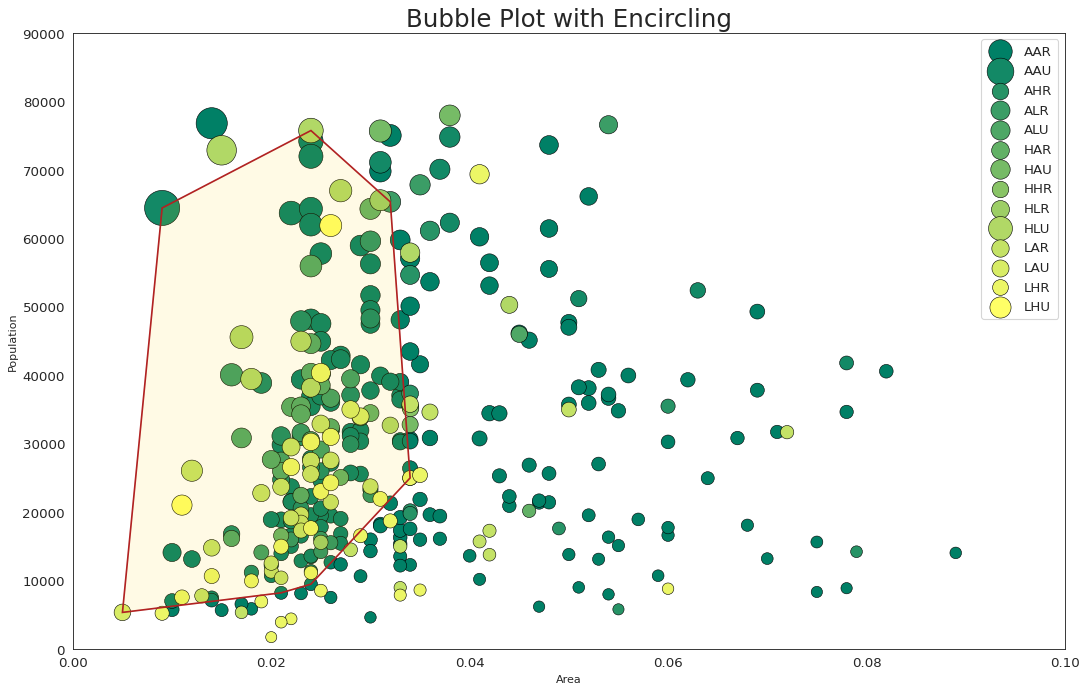

In [8]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("white")

# Step 1: Prepare Data
ds = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Get UNIQUE CATEGORIES..
categories = np.unique(ds['category'])
# GENERATE COLOR FOR EACH CATEGORY
# from matplotlib import colormaps
# list(colormaps)
colors = [plt.cm.summer(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=ds.loc[ds.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = ds.loc[ds.state=='IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)
plt.show()

In [10]:
for i in range(len(categories)):
  print(i/float(len(categories)-1))


0.0
0.07692307692307693
0.15384615384615385
0.23076923076923078
0.3076923076923077
0.38461538461538464
0.46153846153846156
0.5384615384615384
0.6153846153846154
0.6923076923076923
0.7692307692307693
0.8461538461538461
0.9230769230769231
1.0
